In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Explicit map for number of objectives for each file
files_config = [
    ("2502_Results.txt", "250×2", "red", 2),
    ("2503_Results.txt", "250×3", "orange", 3),
    ("2504_Results.txt", "250×4", "pink", 4),
    ("5002_Results.txt", "500×2", "green", 2),
    ("5003_Results.txt", "500×3", "purple", 3),
    ("5004_Results.txt", "500×4", "gray", 4),
    ("7502_Results.txt", "750×2", "blue", 2),
    ("7503_Results.txt", "750×3", "brown", 3),
    ("7504_Results.txt", "750×4", "cyan", 4),
]

def robust_parse_pareto_file(filename, nb_obj):
    arr = []
    with open(filename, "r") as f:
        for idx, line in enumerate(f):
            line = line.strip()
            if not line or line.startswith('#') or line.startswith('='):
                continue
            if ':' in line and line.split(':')[0].isdigit():
                continue
            try:
                values = [float(x) for x in line.split()]
                if len(values) == nb_obj:
                    arr.append(values)
            except Exception:
                continue
    if arr:
        arr_np = np.array(arr)
        arr_unique = np.unique(arr_np, axis=0)
        return arr_unique
    else:
        return np.zeros((0, nb_obj))

def visualize_3d_comparison(results_3d):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('COMPARISON FRONTS PARETO 3D - Hyperspace', 
                 fontsize=16, fontweight='bold')
    ax1 = fig.add_subplot(221, projection='3d')
    for name, arr, color, unique_count in results_3d:
        label = f"{name} ({unique_count})"
        ax1.scatter(arr[:, 0], arr[:, 1], arr[:, 2], c=color, label=label, s=18, alpha=0.85, edgecolors='black')
    ax1.set_xlabel('Objectif 1')
    ax1.set_ylabel('Objectif 2')
    ax1.set_zlabel('Objectif 3')
    ax1.set_title('Vue 3D Combinee', fontsize=12, fontweight='bold')
    ax1.legend()
    projections = [
        (0, 1, 222, 'Projection Obj1-Obj2'),
        (0, 2, 223, 'Projection Obj1-Obj3'),
        (1, 2, 224, 'Projection Obj2-Obj3'),
    ]
    for x_idx, y_idx, pos, title in projections:
        ax = fig.add_subplot(pos)
        for name, arr, color, unique_count in results_3d:
            label = f"{name} ({unique_count})"
            ax.scatter(arr[:, x_idx], arr[:, y_idx], c=color, label=label, s=8, alpha=0.85, edgecolors='black')
        ax.set_xlabel(f'Objectif {x_idx+1}')
        ax.set_ylabel(f'Objectif {y_idx+1}')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
        if pos == 222:
            ax.legend()
    plt.tight_layout()
    plt.savefig("pareto_fronts_3d_comparison.png", dpi=300)
    print("✅ Fronts 3D sauvés: pareto_fronts_3d_comparison.png")
    plt.show()

def visualize_4d_comparison(results_4d):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(24, 18))
    fig.suptitle('FRONTS PARETO 4D', 
                 fontsize=18, fontweight='bold')
    ax_main = fig.add_subplot(231, projection='3d')
    legend_entries = []
    scatter_handles = []
    for name, arr, color, unique_count in results_4d:
        sc = ax_main.scatter(arr[:, 0], arr[:, 1], arr[:, 2], c=arr[:, 3], cmap='viridis',
                             s=18, alpha=0.9, edgecolors='black', label=f"{name} ({unique_count})")
        legend_entries.append(f"{name} ({unique_count})")
        scatter_handles.append(sc)
    cbar = plt.colorbar(sc, ax=ax_main, shrink=0.7)
    cbar.set_label('Objectif 4')
    ax_main.set_xlabel('Objectif 1')
    ax_main.set_ylabel('Objectif 2')
    ax_main.set_zlabel('Objectif 3')
    ax_main.set_title('Hyperespace 4D (Obj4 = couleur)', fontsize=14, fontweight='bold')
    legend_text = '\n'.join(legend_entries)
    ax_main.text2D(0.02, 0.98, legend_text, transform=ax_main.transAxes, 
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    projections = [
        (0, 1, 232, 'Proj. Obj')]

def load_points(filename):
    points = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    x, y = map(float, parts)
                    points.append((x, y))
                except ValueError:
                    continue  # skip invalid lines
    return points

def is_dominated(p1, p2):
    return all(x1 <= x2 for x1, x2 in zip(p1, p2)) and any(x1 < x2 for x1, x2 in zip(p1, p2))

def get_pareto_front(points):
    pareto = []
    for p in points:
        if not any(is_dominated(p, other) for other in points if other != p):
            pareto.append(p)
    return pareto

def main():
    points = load_points("2502_Results.txt")
    pareto_front = get_pareto_front(points)

    # Sort Pareto front for nice line plot
    pareto_front.sort()

    # Split into x and y for plotting
    x_all, y_all = zip(*points)
    x_pareto, y_pareto = zip(*pareto_front)

    # Plot all points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_all, y_all, color='gray', alpha=0.4, label='All Points')

    # Plot Pareto front
    plt.plot(x_pareto, y_pareto, color='red', linewidth=2, label='Pareto Front')
    plt.scatter(x_pareto, y_pareto, color='red')

    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.title("Pareto Front Visualization (Maximization)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

        (0, 2, 233, 'Proj. Obj1-Obj3'),
        (0, 3, 234, 'Proj. Obj1-Obj4'),
        (1, 2, 235, 'Proj. Obj2-Obj3'),
        (1, 3, 236, 'Proj. Obj2-Obj4')
    ]
    for x_idx, y_idx, pos, title in projections:
        ax = fig.add_subplot(pos)
        for name, arr, color, unique_count in results_4d:
            label = f"{name} ({unique_count})"
            ax.scatter(arr[:, x_idx], arr[:, y_idx], c=color, label=label, s=10, alpha=0.8, edgecolors='black')
        ax.set_xlabel(f'Objectif {x_idx+1}')
        ax.set_ylabel(f'Objectif {y_idx+1}')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("pareto_fronts_4d_hyperespace.png", dpi=300)
    print("✅ Fronts 4D hyperespace sauvés: pareto_fronts_4d_hyperespace.png")
    plt.show()

def visualize_all_pareto_fronts_from_txt():
    print("🎨 VISUALISATION PARETO FRONTS DE TOUS LES FICHIERS .txt")
    print("=" * 70)
    results_2d, results_3d, results_4d = [], [], []
    unique_counts = {}
    for filename, name, color, nb_obj in files_config:
        if not os.path.exists(filename):
            print(f"❌ Fichier non trouvé: {filename}")
            continue
        arr = robust_parse_pareto_file(filename, nb_obj)
        unique_count = arr.shape[0]
        unique_counts[filename] = unique_count
        if unique_count > 0:
            if nb_obj == 2:
                results_2d.append((name, arr, color, unique_count))
            elif nb_obj == 3:
                results_3d.append((name, arr, color, unique_count))
            elif nb_obj == 4:
                results_4d.append((name, arr, color, unique_count))
            print(f"✅ {filename}: {unique_count} solutions uniques, {nb_obj} objectifs")
        else:
            print(f"⚠️ {filename}: aucune ligne valide")
    if results_2d:
        plt.figure(figsize=(12,8))
        for name, arr, color, unique_count in results_2d:
            label = f"{name} ({unique_count})"
            plt.scatter(arr[:,0], arr[:,1], c=color, label=label, s=60, alpha=0.7, edgecolors='black')
            sorted_idx = np.argsort(arr[:,0])
            plt.plot(arr[sorted_idx,0], arr[sorted_idx,1], color=color, alpha=0.5, linewidth=2)
        plt.xlabel("Objectif 1")
        plt.ylabel("Objectif 2")
        plt.title("Fronts Pareto 2D")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig("pareto_fronts_2d_.png", dpi=300)
        print("✅ Fronts 2D sauvés: pareto_fronts_2d.png")
        plt.show()
    if results_3d:
        print("\n🎨 Génération graphiques 3D...")
        visualize_3d_comparison(results_3d)
    if results_4d:
        print("\n🎨 Génération graphiques 4D...")
        visualize_4d_comparison(results_4d)
    print("\nRésumé des solutions uniques par fichier :")
    for filename, name, color, nb_obj in files_config:
        if filename in unique_counts:
            print(f"  {filename}: {unique_counts[filename]} solutions uniques")
    print("\n🎉 VISUALISATION TERMINÉE POUR TOUS LES FICHIERS .txt")

if __name__ == "__main__":
    visualize_all_pareto_fronts_from_txt()

IndentationError: unexpected indent (647195585.py, line 154)

In [1]:
def load_points(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    return [tuple(map(float, line.strip().split())) for line in lines]

def is_dominated(p1, p2):
    # Return True if p1 is dominated by p2 (for maximization)
    return all(x1 <= x2 for x1, x2 in zip(p1, p2)) and any(x1 < x2 for x1, x2 in zip(p1, p2))

def get_pareto_front(points):
    pareto = []
    for p in points:
        if not any(is_dominated(p, other) for other in points if other != p):
            pareto.append(p)
    return pareto

def main():
    points = load_points("2502_Results.txt")
    pareto_front = get_pareto_front(points)
    
    # Optional: sort by first objective
    pareto_front.sort()
    
    # Print or save the Pareto front
    for p in pareto_front:
        print(f"{p[0]:.6f} {p[1]:.6f}")

if __name__ == "__main__":
    main()


IndexError: tuple index out of range

In [2]:
def load_points(filename):
    points = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    x, y = map(float, parts)
                    points.append((x, y))
                except ValueError:
                    continue  # Skip non-numeric lines
    return points

def is_dominated(p1, p2):
    # For maximization: p1 is dominated if p2 is better in all and strictly better in one
    return all(x1 <= x2 for x1, x2 in zip(p1, p2)) and any(x1 < x2 for x1, x2 in zip(p1, p2))

def get_pareto_front(points):
    pareto = []
    for p in points:
        if not any(is_dominated(p, other) for other in points if other != p):
            pareto.append(p)
    return pareto

def main():
    points = load_points("2502_Results.txt")
    pareto_front = get_pareto_front(points)
    pareto_front.sort()

    for p in pareto_front:
        if len(p) == 2:
            print(f"{p[0]:.6f} {p[1]:.6f}")

if __name__ == "__main__":
    main()


7362.000000 10048.000000
7430.000000 10039.000000
7534.000000 10030.000000
7599.000000 10026.000000
7627.000000 10018.000000
7632.000000 10016.000000
7716.000000 10015.000000
7753.000000 10010.000000
7870.000000 10009.000000
7939.000000 10000.000000
8004.000000 9992.000000
8012.000000 9983.000000
8032.000000 9981.000000
8042.000000 9973.000000
8043.000000 9971.000000
8058.000000 9970.000000
8060.000000 9969.000000
8121.000000 9964.000000
8181.000000 9950.000000
8229.000000 9947.000000
8307.000000 9919.000000
8344.000000 9896.000000
8360.000000 9895.000000
8364.000000 9885.000000
8399.000000 9883.000000
8408.000000 9869.000000
8411.000000 9867.000000
8443.000000 9863.000000
8459.000000 9857.000000
8491.000000 9852.000000
8507.000000 9844.000000
8524.000000 9842.000000
8531.000000 9828.000000
8567.000000 9827.000000
8569.000000 9800.000000
8587.000000 9798.000000
8602.000000 9796.000000
8607.000000 9792.000000
8610.000000 9773.000000
8631.000000 9772.000000
8635.000000 9771.000000
8637.0

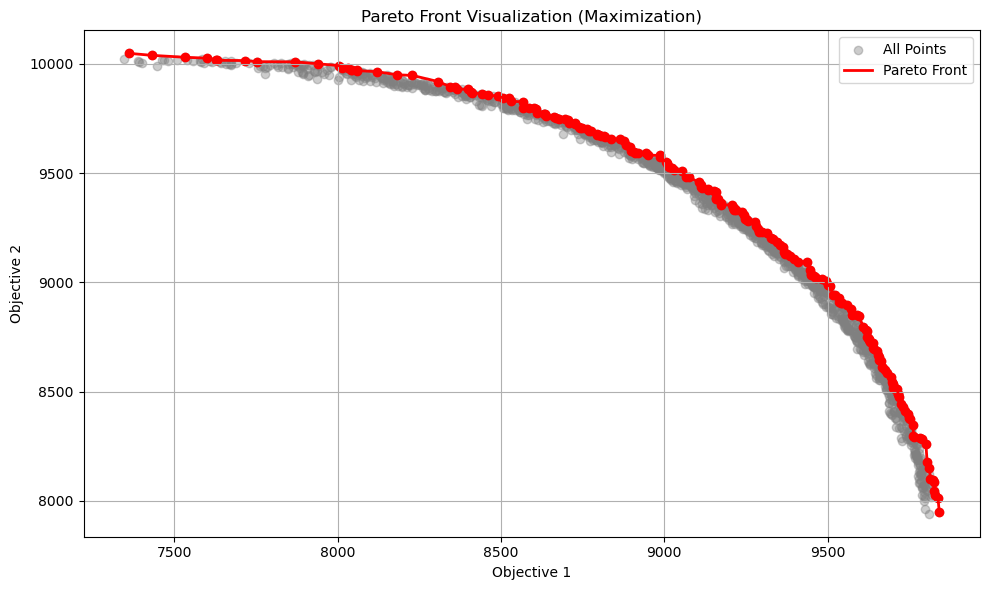

In [4]:
import matplotlib.pyplot as plt

def load_points(filename):
    points = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    x, y = map(float, parts)
                    points.append((x, y))
                except ValueError:
                    continue  # skip invalid lines
    return points

def is_dominated(p1, p2):
    return all(x1 <= x2 for x1, x2 in zip(p1, p2)) and any(x1 < x2 for x1, x2 in zip(p1, p2))

def get_pareto_front(points):
    pareto = []
    for p in points:
        if not any(is_dominated(p, other) for other in points if other != p):
            pareto.append(p)
    return pareto

def main():
    points = load_points("2502_Results.txt")
    pareto_front = get_pareto_front(points)

    # Sort Pareto front for nice line plot
    pareto_front.sort()

    # Split into x and y for plotting
    x_all, y_all = zip(*points)
    x_pareto, y_pareto = zip(*pareto_front)

    # Plot all points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_all, y_all, color='gray', alpha=0.4, label='All Points')

    # Plot Pareto front
    plt.plot(x_pareto, y_pareto, color='red', linewidth=2, label='Pareto Front')
    plt.scatter(x_pareto, y_pareto, color='red')

    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.title("Pareto Front Visualization (Maximization)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Total points: 1389
Pareto-optimal points: 198


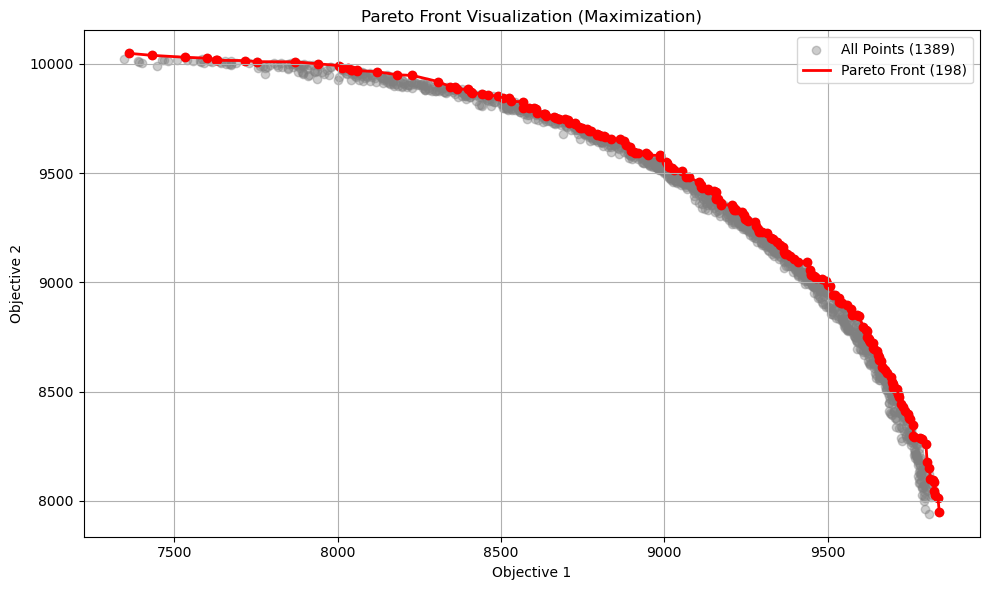

In [5]:
import matplotlib.pyplot as plt

def load_points(filename):
    points = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    x, y = map(float, parts)
                    points.append((x, y))
                except ValueError:
                    continue
    return points

def is_dominated(p1, p2):
    # For maximization
    return all(x1 <= x2 for x1, x2 in zip(p1, p2)) and any(x1 < x2 for x1, x2 in zip(p1, p2))

def get_pareto_front(points):
    pareto = []
    for p in points:
        if not any(is_dominated(p, other) for other in points if other != p):
            pareto.append(p)
    return pareto

def main():
    points = load_points("2502_Results.txt")
    pareto_front = get_pareto_front(points)
    pareto_front.sort()

    print(f"Total points: {len(points)}")
    print(f"Pareto-optimal points: {len(pareto_front)}")

    x_all, y_all = zip(*points)
    x_pareto, y_pareto = zip(*pareto_front)

    plt.figure(figsize=(10, 6))
    plt.scatter(x_all, y_all, color='gray', alpha=0.4, label=f'All Points ({len(points)})')
    plt.plot(x_pareto, y_pareto, color='red', linewidth=2, label=f'Pareto Front ({len(pareto_front)})')
    plt.scatter(x_pareto, y_pareto, color='red')

    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.title("Pareto Front Visualization (Maximization)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Total points: 2034
Pareto-optimal points: 350


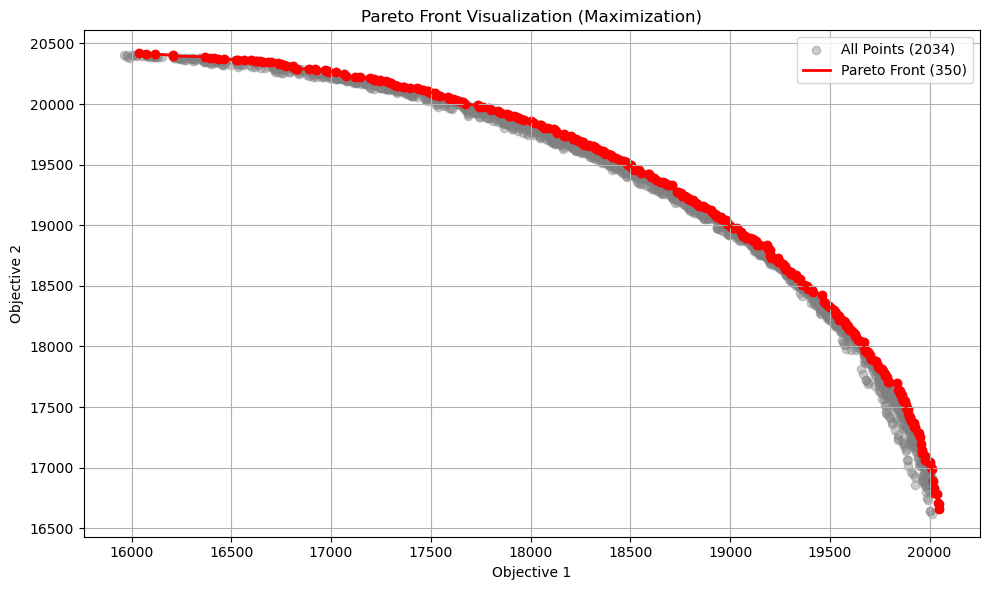

In [9]:
import matplotlib.pyplot as plt

def load_points(filename):
    points = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    x, y = map(float, parts)
                    points.append((x, y))
                except ValueError:
                    continue
    return points

def is_dominated(p1, p2):
    # For maximization
    return all(x1 <= x2 for x1, x2 in zip(p1, p2)) and any(x1 < x2 for x1, x2 in zip(p1, p2))

def get_pareto_front(points):
    pareto = []
    for p in points:
        if not any(is_dominated(p, other) for other in points if other != p):
            pareto.append(p)
    return pareto

def main():
    points = load_points("5002_Results.txt")
    pareto_front = get_pareto_front(points)
    pareto_front.sort()

    print(f"Total points: {len(points)}")
    print(f"Pareto-optimal points: {len(pareto_front)}")

    x_all, y_all = zip(*points)
    x_pareto, y_pareto = zip(*pareto_front)

    plt.figure(figsize=(10, 6))
    plt.scatter(x_all, y_all, color='gray', alpha=0.4, label=f'All Points ({len(points)})')
    plt.plot(x_pareto, y_pareto, color='red', linewidth=2, label=f'Pareto Front ({len(pareto_front)})')
    plt.scatter(x_pareto, y_pareto, color='red')

    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.title("Pareto Front Visualization (Maximization)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()